In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('adult_with_headers (1).csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Display initial rows and summary information
print(df.head())
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

Handling Missing Values

In [8]:
# Replace '?' with np.nan for proper missing value handling
df.replace('?', np.nan, inplace=True)
df
# Check missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [14]:
# For categorical columns, fill missing with the mode (most frequent value)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# For numerical columns, fill missing with the median value
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col] = df[col].fillna(df[col].median())

# Confirm missing values have been handled
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Scaling Numarical Features

In [15]:
# Identify numerical columns (excluding the target variable if necessary)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Standard Scaling
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = scaler_std.fit_transform(df_std_scaled[num_cols])

# Min-Max Scaling
scaler_mm = MinMaxScaler()
df_mm_scaled = df.copy()
df_mm_scaled[num_cols] = scaler_mm.fit_transform(df_mm_scaled[num_cols])


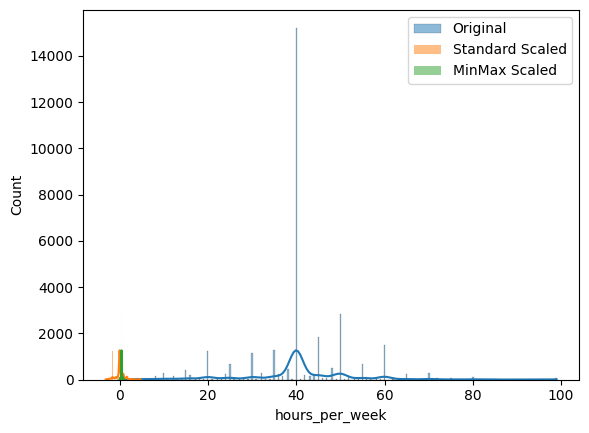

In [18]:
#Distribution before and after scaling for a single feature
sns.histplot(df['hours_per_week'], kde=True, label='Original')
sns.histplot(df_std_scaled['hours_per_week'], kde=True, label='Standard Scaled')
sns.histplot(df_mm_scaled['hours_per_week'], kde=True, label='MinMax Scaled')
plt.legend()
plt.show()

Encoding Categorical Variables

In [19]:
# Find categorical columns and unique counts
cat_cols = df.select_dtypes(include='object').columns

# One-Hot Encoding for <5 unique categories
one_hot_cols = [col for col in cat_cols if df[col].nunique() < 5]
df_oh = pd.get_dummies(df, columns=one_hot_cols)

# Label Encoding for >5 unique categories
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() >= 5:
        df_oh[col] = le.fit_transform(df_oh[col])

# Show result
print(df_oh.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  capital_gain  capital_loss  hours_per_week  \
0           1             1     4          2174             0              40   
1           4             0     4             0             0              13   
2           6             1     4             0             0              40   
3           6             0     2             0             0              40   
4          10             5     2             0             0              40   

   native_country  sex_ Female  sex_ Male  income_ <=50K  income_ >50K  
0            

Feature Engineering

In [22]:
# Example feature 1: 'age_group'
df_oh['age_group'] = pd.cut(df_oh['age'], bins=[16, 30, 45, 60, 90], labels=['Young', 'Mid-age', 'Senior', 'Old'])

# Example feature 2: 'hours_per_capital_gain' (to capture effort vs gain)
df_oh['hours_per_cgain'] = df_oh['hours_per_week'] / (df_oh['capital_gain'] + 1)

# Explain rationale in comments
# 'age_group' gives categorical granularity: different age groups may have different income patterns.
# 'hours_per_cgain' shows time-efficiency: how much work yields higher gains; high values may correlate with higher/lower income.

print(df_oh[['age', 'age_group', 'hours_per_week', 'capital_gain', 'hours_per_cgain']].head())

   age age_group  hours_per_week  capital_gain  hours_per_cgain
0   39   Mid-age              40          2174         0.018391
1   50    Senior              13             0        13.000000
2   38   Mid-age              40             0        40.000000
3   53    Senior              40             0        40.000000
4   28     Young              40             0        40.000000


Transformation of SKewed Features

In [25]:
# Identify skewed columns
skewed_cols = ['capital_gain', 'capital_loss']

# Apply log transformation (log(1 + x) to handle 0 values)
for col in skewed_cols:
    if abs(df_oh[col].skew()) > 1:
        df_oh[col + '_log'] = np.log1p(df_oh[col])

# Justification: Log transform reduces extreme skewness, helping linear models and distance-based metrics.
print(df_oh[[col for col in df_oh.columns if 'log' in col]].head())

   capital_gain_log  capital_loss_log
0          7.684784               0.0
1          0.000000               0.0
2          0.000000               0.0
3          0.000000               0.0
4          0.000000               0.0


# Summary:

Data Exploration and Cleaning:
The process begins with loading the dataset, exploring its structure, and identifying missing values. Missing data is handled using imputation strategies—mode for categorical features and median for numerical features—to ensure the dataset is complete and ready for analysis.

Feature Scaling:
Two scaling methods are applied to numerical features: Standard Scaling (which centers data around the mean and standard deviation) and Min-Max Scaling (which rescales features to a fixed range, usually 0 to 1). The assignment explains when each method is preferred, such as using Standard Scaling for normally distributed data and Min-Max Scaling for algorithms sensitive to feature magnitude.

Encoding Categorical Variables:
Categorical features with fewer than five categories are transformed using One-Hot Encoding, which creates binary columns for each category. Features with more than five categories use Label Encoding, which assigns a unique integer to each category. The pros and cons of each method are discussed, highlighting issues like dimensionality and the risk of introducing artificial order.

Feature Engineering:
At least two new features are created to provide additional insights for the model. For example, grouping ages or calculating ratios between work hours and capital gain. These engineered features are designed to capture patterns not directly available in the original data.

Transformation of Skewed Features:
Skewed numerical features, such as capital-gain, are transformed using a log function to reduce skewness and improve the performance of machine learning algorithms that assume normality.